In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)

In [29]:
zris_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/Zip_ZORI_AllHomesPlusMultifamily_Smoothed.csv')
zri_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [37]:
zris = zris_raw.copy()
zri = zri_raw.copy()

In [38]:
zri = zri[zri['MsaName'].isin(['Austin, TX', 'El Paso, TX', 'Houston, TX', 'Dallas-Fort Worth, TX', 'San Antonio, TX'])]

In [39]:
# no idea what these first few columns mean
zri

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
3,91982,77494,4,"Houston, TX",1390.0,1387.0,1384.0,1381.0,1379.0,1376.0,1373.0,1370.0,1368.0,1365.0,1362.0,1360.0,1358.0,1357.0,1357.0,1356.0,1355.0,1355.0,1354.0,1352.0,1350.0,1348.0,1344.0,1341.0,1337.0,1333.0,1328.0,1323.0,1318.0,1313.0,1309.0,1305.0,1302.0,1299.0,1298.0,1296.0,1295.0,1295.0,1295.0,1295.0,1298.0,1301.0,1305.0,1308.0,1312.0,1316.0,1318.0,1321.0,1323.0,1325.0,1327.0,1329.0,1330.0,1330.0,1331.0,1331.0,1332.0,1332.0,1334.0,1335.0,1336.0,1338.0,1340.0,1342.0,1344.0,1346.0,1348.0,1350.0,1352.0,1354.0,1355.0,1356.0,1357.0,1358.0,1359.0,1361.0,1362.0,1364.0,1366.0,1370.0,1374.0,1378.0,1387.0,1395.0,1404.0,1414.0,1423.0,1432.0,1442.0,1452.0,1462.0
5,91940,77449,6,"Houston, TX",1202.0,1205.0,1209.0,1213.0,1217.0,1221.0,1224.0,1228.0,1232.0,1236.0,1240.0,1244.0,1249.0,1253.0,1257.0,1261.0,1264.0,1267.0,1271.0,1274.0,1277.0,1280.0,1282.0,1284.0,1285.0,1286.0,1287.0,1287.0,1287.0,1287.0,1286.0,1286.0,1286.0,1285.0,1285.0,1285.0,1285.0,1286.0,1287.0,1289.0,1292.0,1294.0,1297.0,1302.0,1306.0,1310.0,1314.0,1319.0,1323.0,1327.0,1331.0,1335.0,1338.0,1340.0,1343.0,1345.0,1346.0,1348.0,1349.0,1351.0,1352.0,1353.0,1355.0,1356.0,1358.0,1360.0,1362.0,1364.0,1366.0,1369.0,1371.0,1374.0,1376.0,1380.0,1384.0,1388.0,1395.0,1401.0,1408.0,1418.0,1428.0,1438.0,1452.0,1466.0,1479.0,1494.0,1508.0,1522.0,1537.0,1552.0,1567.0
7,91733,77084,8,"Houston, TX",1058.0,1065.0,1071.0,1077.0,1083.0,1089.0,1095.0,1100.0,1106.0,1112.0,1116.0,1121.0,1125.0,1129.0,1133.0,1137.0,1140.0,1142.0,1145.0,1148.0,1150.0,1152.0,1154.0,1155.0,1157.0,1157.0,1157.0,1158.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1157.0,1158.0,1159.0,1161.0,1164.0,1166.0,1170.0,1174.0,1177.0,1181.0,1185.0,1189.0,1192.0,1195.0,1198.0,1201.0,1204.0,1207.0,1210.0,1212.0,1214.0,1217.0,1220.0,1222.0,1225.0,1228.0,1231.0,1233.0,1234.0,1236.0,1238.0,1239.0,1241.0,1243.0,1246.0,1248.0,1251.0,1253.0,1256.0,1258.0,1261.0,1264.0,1267.0,1270.0,1274.0,1279.0,1284.0,1289.0,1298.0,1306.0,1315.0,1324.0,1333.0,1342.0,1351.0,1361.0,1370.0
8,93144,79936,9,"El Paso, TX",887.0,886.0,885.0,885.0,884.0,884.0,883.0,883.0,883.0,882.0,883.0,883.0,884.0,885.0,887.0,888.0,889.0,890.0,890.0,891.0,891.0,892.0,892.0,892.0,893.0,893.0,894.0,895.0,898.0,901.0,903.0,906.0,908.0,910.0,911.0,912.0,913.0,913.0,912.0,912.0,910.0,908.0,905.0,903.0,901.0,899.0,899.0,899.0,900.0,900.0,901.0,901.0,902.0,903.0,904.0,905.0,906.0,907.0,908.0,910.0,911.0,913.0,915.0,917.0,919.0,922.0,925.0,928.0,932.0,935.0,938.0,942.0,945.0,950.0,954.0,958.0,962.0,967.0,971.0,976.0,981.0,986.0,993.0,999.0,1005.0,1011.0,1017.0,1024.0,1030.0,1036.0,1043.0
18,92271,78130,24,"San Antonio, TX",1118.0,1125.0,1132.0,1139.0,1146.0,1152.0,1158.0,1164.0,1170.0,1176.0,1180.0,1184.0,1189.0,1189.0,1190.0,1190.0,1189.0,1189.0,1188.0,1189.0,1190.0,1191.0,1192.0,1193.0,1194.0,1195.0,1195.0,1196.0,1197.0,1197.0,1198.0,1199.0,1201.0,1202.0,1203.0,1205.0,1206.0,1207.0,1208.0,1209.0,1210.0,1212.0,1213.0,1214.0,1215.0,1217.0,1218.0,1219.0,1220.0,1222.0,1224.0,1226.0,1227.0,1229.0,1230.0,1232.0,1234.0,1236.0,1239.0,1242.0,1244.0,1247.0,1250.0,1253.0,1256.0,1260.0,1264.0,1267.0,1270.0,1273.0,1273.0,1274.0,1274.0,1274.0,1274.0,1274.0,1274.0,1274.0,1273.0,1274.0,1275.0,1276.0,1285.0,1294.0,1302.0,1312.0,1321.0,1331.

In [111]:
dallas = zri[zri['MsaName'] == 'Dallas-Fort Worth, TX']

In [112]:
# pick a random location for some test visualizations
test = dallas[dallas['RegionName'] == 75052]

In [113]:
test = test.iloc[:, 4:]
test = test.T

In [114]:
test = test.reset_index()
test

,index,33
0,2014-01,1037.0
1,2014-02,1043.0
2,2014-03,1050.0
3,2014-04,1056.0
4,2014-05,1062.0
...,...,...
86,2021-03,1502.0
87,2021-04,1516.0
88,2021-05,1530.0
89,2021-06,1544.0


In [115]:
test.rename(columns = {33:'ZRI', 'index': 'date'}, inplace = True)

In [119]:
test['date'] = pd.to_datetime(test['date'])

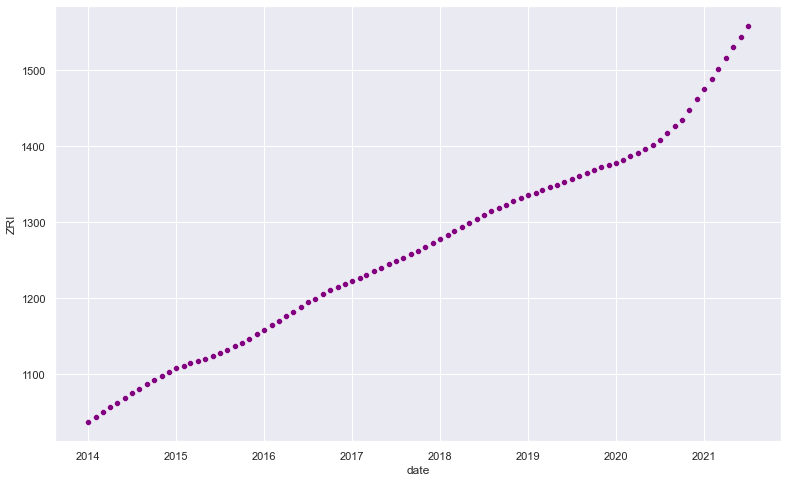

In [146]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(13, 8)})
sns.scatterplot(data=test, x='date', y='ZRI', color='purple');

In [124]:
test.dtypes

date    datetime64[ns]
ZRI            float64
dtype: object